# Predict Career related industries

## Kaggle Contest:
    Link : https://www.kaggle.com/c/codeasylums-asynamite-101/data

## Problem Statement

You have been given a job posting dataset. Your task is to classify the dataset into one of the industries (Ex - IT-Software / Software Services, Recruitment / Staffing, Real Estate / Property etc). However, You have given a training dataset. Using Machine Learning, find the pattern and predict industries on the given test dataset.

Importing numpy, pandas and matplotlib.pyplot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('trainData.csv')
train.head()

,Id,company,education,experience,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,skills,industry
0,1,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Job Description Send me Jobs like this Quali...,2.110000e+11,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,ITES,Media / Entertainment / Internet
1,2,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Job Description Send me Jobs like this Quali...,2.110000e+11,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,Marketing,Advertising / PR / MR / Event Management
2,3,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,Job Description Send me Jobs like this - as ...,1.010000e+11,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,IT Software - Application Programming,IT-Software / Software Services
3,4,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Job Description Send me Jobs like this - Inv...,8.101690e+10,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,Accounts,Banking / Financial Services / Broking
4,5,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,Job Description Send me Jobs like this Pleas...,1.210000e+11,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,IT Software - Application Programming,IT-Software / Software Services


In [3]:
print('Length:',len(train)) 
print(train.count())

Length: 19422
Id                     19422
company                19419
education              18198
experience             19419
jobdescription         19419
jobid                  19422
joblocation_address    18922
jobtitle               19422
numberofpositions       3784
payrate                19370
postdate               19403
skills                 18955
industry               19418
dtype: int64


In [4]:
train.isnull().sum()

Id                         0
company                    3
education               1224
experience                 3
jobdescription             3
jobid                      0
joblocation_address      500
jobtitle                   0
numberofpositions      15638
payrate                   52
postdate                  19
skills                   467
industry                   4
dtype: int64

In [5]:
train['skills'].value_counts()

IT Software - Application Programming      5387
Sales                                      2617
ITES                                       1431
HR                                          842
Marketing                                   811
Accounts                                    766
Teaching                                    597
Production                                  594
Medical                                     382
IT Software - Other                         360
Financial Services                          360
Engineering Design                          336
IT Software - Network Administration        324
IT Software - eCommerce                     321
IT Software - QA & Testing                  315
IT Software - ERP                           309
Site Engineering                            297
Journalism                                  245
IT Software - DBA                           242
IT Software - Embedded                      236
Design                                  

In [6]:
train['industry'].value_counts()

IT-Software / Software Services           8363
BPO / Call Centre / ITES                  1095
Banking / Financial Services / Broking    1083
Recruitment / Staffing                    1029
Education / Teaching / Training            811
                                          ... 
Medical Devices / Equipments                 4
Brewery / Distillery                         3
Pulp and Paper                               2
Broadcasting                                 1
Leather                                      1
Name: industry, Length: 63, dtype: int64

## Trying to solve the problem without using ML

Using the dictionary 'job_skills' with 'skills' as key and 'industry' as value, and then filling out the industries for corresponding 'Id' in 'testData' and 'submission_file'.

### Got the f1 score of 0.54929

In [16]:
job_skills = {}

In [17]:
skill_industry = train[['skills','industry']]
skill_industry

,skills,industry
0,ITES,Media / Entertainment / Internet
1,Marketing,Advertising / PR / MR / Event Management
2,IT Software - Application Programming,IT-Software / Software Services
3,Accounts,Banking / Financial Services / Broking
4,IT Software - Application Programming,IT-Software / Software Services
...,...,...
19417,IT Software - QA & Testing,Banking / Financial Services / Broking
19418,IT Software - Application Programming,IT-Software / Software Services
19419,IT Software - Application Programming,Internet / Ecommerce
19420,IT Software - Application Programming,IT-Software / Software Services


In [18]:
for i in range(len(skill_industry)):
    job_skills[skill_industry.loc[i,'skills']] = skill_industry.loc[i,'industry']

In [19]:
print(len(job_skills), len(skill_industry['skills'].unique()))

46 46


In [20]:
print(job_skills)

{'ITES': 'Internet / Ecommerce', 'Marketing': 'Internet / Ecommerce', 'IT Software - Application Programming': 'IT-Software / Software Services', 'Accounts': 'Internet / Ecommerce', 'Production': 'Automobile / Auto Anciliary / Auto Components', 'Sales': 'Industrial Products / Heavy Machinery', 'IT Software - Other': 'IT-Software / Software Services', 'Executive Assistant': 'Oil and Gas / Energy / Power / Infrastructure', 'IT Software - Mobile': 'Internet / Ecommerce', 'Engineering Design': 'FMCG / Foods / Beverage', 'Financial Services': 'KPO / Research / Analytics', 'Hotels': 'Travel / Hotels / Restaurants / Airlines / Railways', 'IT Software - QA & Testing': 'Banking / Financial Services / Broking', 'HR': 'IT-Software / Software Services', 'Supply Chain': 'FMCG / Foods / Beverage', 'IT Software - Network Administration': 'IT-Software / Software Services', 'Architecture': 'Architecture / Interior Design', 'Legal': 'Fertilizers / Pesticides', 'Site Engineering': 'IT-Software / Software

In [21]:
sample_submission = pd.read_csv('sample_submission.csv')

In [22]:
print(sample_submission.head())

      Id                         industry
0  19423  IT-Software / Software Services
1  19424  IT-Software / Software Services
2  19425  IT-Software / Software Services
3  19426  IT-Software / Software Services
4  19427  IT-Software / Software Services


In [23]:
test = pd.read_csv('testData.csv')

In [24]:
print(test.head())

      Id                                            company  \
0  19423  Radial HR Solutions hiring for Client of Radia...   
1  19424                     Hindco Recruitment Consultants   
2  19425                               Trigent Software Ltd   
3  19426  Career Trackers and Consulting hiring for A ve...   
4  19427                                       Confidential   

                                           education experience  \
0                                                NaN  3 - 8 yrs   
1              UG: Any Graduate - Any Specialization  4 - 9 yrs   
2  UG: B.Tech/B.E. - Any Specialization PG:MCA - ...  6 - 8 yrs   
3  UG: Any Graduate, Graduation Not Required PG:A...  4 - 9 yrs   
4  UG: Any Graduate - Any Specialization PG:Any P...  3 - 8 yrs   

                                      jobdescription         jobid  \
0  Job Description   Send me Jobs like this Requi...  2.110000e+11   
1  Job Description   Send me Jobs like this - To ...  2.810000e+11   
2  Job D

In [25]:
print(test['skills'].value_counts())

IT Software - Application Programming      602
Teaching                                   494
Sales                                      276
ITES                                       209
Accounts                                    94
HR                                          86
Production                                  73
Marketing                                   57
Financial Services                          53
IT Software - Network Administration        48
IT Software - Other                         47
Engineering Design                          46
IT Software - ERP                           45
IT Hardware                                 37
Medical                                     36
IT Software - DBA                           31
IT Software - QA & Testing                  27
IT Software - Embedded                      26
Site Engineering                            25
Supply Chain                                24
IT Software - Mobile                        23
IT Software -

In [26]:
print(len(test['skills'].unique()))

41


In [27]:
for i in range(len(test)):
    test.loc[i,'industry'] = job_skills[test.loc[i, 'skills']]

In [28]:
print(test.head())

      Id                                            company  \
0  19423  Radial HR Solutions hiring for Client of Radia...   
1  19424                     Hindco Recruitment Consultants   
2  19425                               Trigent Software Ltd   
3  19426  Career Trackers and Consulting hiring for A ve...   
4  19427                                       Confidential   

                                           education experience  \
0                                                NaN  3 - 8 yrs   
1              UG: Any Graduate - Any Specialization  4 - 9 yrs   
2  UG: B.Tech/B.E. - Any Specialization PG:MCA - ...  6 - 8 yrs   
3  UG: Any Graduate, Graduation Not Required PG:A...  4 - 9 yrs   
4  UG: Any Graduate - Any Specialization PG:Any P...  3 - 8 yrs   

                                      jobdescription         jobid  \
0  Job Description   Send me Jobs like this Requi...  2.110000e+11   
1  Job Description   Send me Jobs like this - To ...  2.810000e+11   
2  Job D

In [29]:
test[['Id','industry']].to_csv('test_submission.csv', index=False)

## As one skill can have mapping to multiple industries, found out the industry with highest count for that particular skill.

### F1 Score: 0.64064

In [30]:
from collections import defaultdict 
test_dict = defaultdict(list)

In [31]:
for i in range(len(test)):
    if test.loc[i, 'skills'] in test_dict:
        test_dict[test.loc[i, 'skills']].append(job_skills[test.loc[i, 'skills']])
    else:
        test_dict[test.loc[i, 'skills']] = []
        test_dict[test.loc[i, 'skills']].append(job_skills[test.loc[i, 'skills']])

In [32]:
print(len(test_dict))

41


In [33]:
unique_dict = defaultdict(list)
for key,value in test_dict.items():
    unique_dict[value[0]].append(key)

In [34]:
print(len(unique_dict))
print(unique_dict)

19
defaultdict(<class 'list'>, {'Industrial Products / Heavy Machinery': ['Sales'], 'IT-Software / Software Services': ['IT Software - DBA', 'IT Software - Network Administration', 'IT Software - Application Programming', 'HR', 'IT Software - Mainframe', 'IT Software - Client/Server Programming', 'IT Software - Other', 'IT Software - eCommerce', 'IT Software - System Programming', 'IT Software - Middleware', 'Site Engineering', 'Top Management'], 'Internet / Ecommerce': ['ITES', 'Marketing', 'Accounts', 'Analytics & Business Intelligence', 'IT Software - Mobile', 'Journalism', 'Design'], 'Pharma / Biotech / Clinical Research': ['Medical', nan], 'Semiconductors / Electronics': ['IT Software - Embedded', 'IT Hardware'], 'Banking / Financial Services / Broking': ['IT Software - QA & Testing'], 'Automobile / Auto Anciliary / Auto Components': ['Production'], 'KPO / Research / Analytics': ['Financial Services'], 'Recruitment / Staffing': ['IT Software - ERP', 'IT Software - Systems'], 'Trav

In [35]:
test_dict

defaultdict(list,
            {'Sales': ['Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / Heavy Machinery',
              'Industrial Products / H

In [36]:
test.isnull().sum()

Id                        0
company                   0
education               771
experience                0
jobdescription            0
jobid                     0
joblocation_address       0
jobtitle                  0
numberofpositions      1897
payrate                  44
postdate                  3
skills                   60
industry                  0
dtype: int64

In [37]:
train['skills'].value_counts()

IT Software - Application Programming      5387
Sales                                      2617
ITES                                       1431
HR                                          842
Marketing                                   811
Accounts                                    766
Teaching                                    597
Production                                  594
Medical                                     382
IT Software - Other                         360
Financial Services                          360
Engineering Design                          336
IT Software - Network Administration        324
IT Software - eCommerce                     321
IT Software - QA & Testing                  315
IT Software - ERP                           309
Site Engineering                            297
Journalism                                  245
IT Software - DBA                           242
IT Software - Embedded                      236
Design                                  

In [38]:
skill_industry_count = defaultdict(list)

In [39]:
for i in range(len(skill_industry)):
    skill_industry_count[skill_industry.loc[i,'skills']].append(skill_industry.loc[i,'industry'])

In [40]:
skill_industry_unique_count = {}
for key,value in skill_industry_count.items():
    skill_industry_unique_count[key] = len(set(value))

In [41]:
skill_industry_unique_count

{'ITES': 40,
 'Marketing': 44,
 'IT Software - Application Programming': 44,
 'Accounts': 48,
 'Production': 41,
 'Sales': 58,
 'IT Software - Other': 24,
 'Executive Assistant': 39,
 'IT Software - Mobile': 11,
 'Engineering Design': 38,
 'Financial Services': 22,
 'Hotels': 17,
 'IT Software - QA & Testing': 23,
 'HR': 44,
 'Supply Chain': 36,
 'IT Software - Network Administration': 21,
 'Architecture': 12,
 'Legal': 22,
 'Site Engineering': 35,
 'Journalism': 24,
 nan: 47,
 'IT Software - DBA': 13,
 'Strategy': 21,
 'Medical': 22,
 'Design': 27,
 'Defence Forces': 7,
 'IT Software - Mainframe': 2,
 'IT Software - Telecom Software': 8,
 'IT Software - Embedded': 16,
 'IT Software - Middleware': 4,
 'Teaching': 23,
 'IT Software - System Programming': 19,
 'IT Software - Client/Server Programming': 8,
 'Travel': 7,
 'IT Software - eCommerce': 17,
 'TV': 8,
 'Fashion Designing': 8,
 'IT Software - ERP': 20,
 'IT Hardware': 21,
 'Analytics & Business Intelligence': 29,
 'Beauty/Fitness

In [42]:
skill_industry_count

defaultdict(list,
            {'ITES': ['Media / Entertainment / Internet',
              'IT-Software / Software Services',
              'Recruitment / Staffing',
              'IT-Software / Software Services',
              'IT-Software / Software Services',
              'BPO / Call Centre / ITES',
              'Banking / Financial Services / Broking',
              'Internet / Ecommerce',
              'Internet / Ecommerce',
              'Recruitment / Staffing',
              'BPO / Call Centre / ITES',
              'BPO / Call Centre / ITES',
              'Medical / Healthcare / Hospitals',
              'Medical / Healthcare / Hospitals',
              'BPO / Call Centre / ITES',
              'BPO / Call Centre / ITES',
              'NGO / Social Services / Regulators / Industry Associations',
              'Real Estate / Property',
              'BPO / Call Centre / ITES',
              'Education / Teaching / Training',
              'BPO / Call Centre / ITES',
      

In [43]:
from collections import Counter
def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0]

In [44]:
skill_industry_frequent = {}
for key,value in skill_industry_count.items():
    skill_industry_frequent[key] = most_frequent(value)

In [45]:
skill_industry_frequent

{'ITES': 'BPO / Call Centre / ITES',
 'Marketing': 'IT-Software / Software Services',
 'IT Software - Application Programming': 'IT-Software / Software Services',
 'Accounts': 'Accounting / Finance',
 'Production': 'Automobile / Auto Anciliary / Auto Components',
 'Sales': 'IT-Software / Software Services',
 'IT Software - Other': 'IT-Software / Software Services',
 'Executive Assistant': 'IT-Software / Software Services',
 'IT Software - Mobile': 'IT-Software / Software Services',
 'Engineering Design': 'Automobile / Auto Anciliary / Auto Components',
 'Financial Services': 'Banking / Financial Services / Broking',
 'Hotels': 'Travel / Hotels / Restaurants / Airlines / Railways',
 'IT Software - QA & Testing': 'IT-Software / Software Services',
 'HR': 'Recruitment / Staffing',
 'Supply Chain': 'Automobile / Auto Anciliary / Auto Components',
 'IT Software - Network Administration': 'IT-Software / Software Services',
 'Architecture': 'Architecture / Interior Design',
 'Legal': 'Legal',

In [46]:
for i in range(len(test)):
    test.loc[i,'industry'] = skill_industry_frequent[test.loc[i, 'skills']]

In [47]:
test[['Id','industry']].to_csv('frequent_submission.csv', index=False)

In [48]:
train.head()

,Id,company,education,experience,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,skills,industry
0,1,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Job Description Send me Jobs like this Quali...,2.110000e+11,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,ITES,Media / Entertainment / Internet
1,2,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Job Description Send me Jobs like this Quali...,2.110000e+11,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,Marketing,Advertising / PR / MR / Event Management
2,3,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,Job Description Send me Jobs like this - as ...,1.010000e+11,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,IT Software - Application Programming,IT-Software / Software Services
3,4,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Job Description Send me Jobs like this - Inv...,8.101690e+10,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,Accounts,Banking / Financial Services / Broking
4,5,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,Job Description Send me Jobs like this Pleas...,1.210000e+11,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,IT Software - Application Programming,IT-Software / Software Services


In [49]:
train['jobdescription'].head()

0    Job Description   Send me Jobs like this Quali...
1    Job Description   Send me Jobs like this Quali...
2    Job Description   Send me Jobs like this - as ...
3    Job Description   Send me Jobs like this - Inv...
4    Job Description   Send me Jobs like this Pleas...
Name: jobdescription, dtype: object

In [50]:
print(len(train['jobdescription']),len(train['jobdescription'].unique())) 

19422 18990


In [51]:
print(train['jobdescription'][0])
print('--------------------------------------------------------')
print(train['jobdescription'][1000])

Job Description   Send me Jobs like this Qualifications: - == > 10th To Graduation & Any Skill: - == > Basic Computer Knowledge Job Requirement : - == > System or Laptop Type of job: - == > Full Time or Part time Languages : - == > Tamil & English. Experience : - == > Freshers & Experience payment details: - 1 form per day 5/- 10 form per day 50/- 100 form per day 500/- monthly you can earn 15000/- per month Selection Process: - == > Easy Selection Process,So What Are You Waiting For? Apply Now & Grab Best Opportunity To Make Your Carrier & To Improve Your Earing Skills. More detail contact Mr Hari 8678902528 9003010282 Salary:INR 1,50,000 - 2,25,000 P.A Industry: Media / Entertainment / Internet Functional Area: ITES , BPO , KPO , LPO , Customer Service , Operations Role Category:Other Role:Fresher Keyskills English Typing Part Time Data Entry Selection Process Desired Candidate Profile Education- UG: B.Tech/B.E. - Any Specialization PG:Any Postgraduate - Any Specialization, Post Grad

## Using NLP techniques

Reference : https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

In [52]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/sai-
[nltk_data]     girish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sai-girish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
stop_words = set(stopwords.words('english'))

In [54]:
def get_job_description_filters(description):
    features = []
    word_tokens = nltk.word_tokenize(description)
    filtered_words = [w for w in word_tokens if not w in stop_words]
    for word in filtered_words:
        features.append(word.lower())
    return features

In [55]:
description_industry = train[['Id','jobdescription','industry']]
description_industry.head()

,Id,jobdescription,industry
0,1,Job Description Send me Jobs like this Quali...,Media / Entertainment / Internet
1,2,Job Description Send me Jobs like this Quali...,Advertising / PR / MR / Event Management
2,3,Job Description Send me Jobs like this - as ...,IT-Software / Software Services
3,4,Job Description Send me Jobs like this - Inv...,Banking / Financial Services / Broking
4,5,Job Description Send me Jobs like this Pleas...,IT-Software / Software Services


In [56]:
print(get_job_description_filters(description_industry.loc[0,'jobdescription']))

['job', 'description', 'send', 'jobs', 'like', 'qualifications', ':', '-', '==', '>', '10th', 'to', 'graduation', '&', 'any', 'skill', ':', '-', '==', '>', 'basic', 'computer', 'knowledge', 'job', 'requirement', ':', '-', '==', '>', 'system', 'laptop', 'type', 'job', ':', '-', '==', '>', 'full', 'time', 'part', 'time', 'languages', ':', '-', '==', '>', 'tamil', '&', 'english', '.', 'experience', ':', '-', '==', '>', 'freshers', '&', 'experience', 'payment', 'details', ':', '-', '1', 'form', 'per', 'day', '5/-', '10', 'form', 'per', 'day', '50/-', '100', 'form', 'per', 'day', '500/-', 'monthly', 'earn', '15000/-', 'per', 'month', 'selection', 'process', ':', '-', '==', '>', 'easy', 'selection', 'process', ',', 'so', 'what', 'are', 'you', 'waiting', 'for', '?', 'apply', 'now', '&', 'grab', 'best', 'opportunity', 'to', 'make', 'your', 'carrier', '&', 'to', 'improve', 'your', 'earing', 'skills', '.', 'more', 'detail', 'contact', 'mr', 'hari', '8678902528', '9003010282', 'salary', ':', 'inr

In [57]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [58]:
len(nltk.word_tokenize(description_industry.loc[0,'jobdescription']))

354

In [59]:
print(len(get_job_description_filters(description_industry.loc[0,'jobdescription'])))

306


In [60]:
description_industry.head()

,Id,jobdescription,industry
0,1,Job Description Send me Jobs like this Quali...,Media / Entertainment / Internet
1,2,Job Description Send me Jobs like this Quali...,Advertising / PR / MR / Event Management
2,3,Job Description Send me Jobs like this - as ...,IT-Software / Software Services
3,4,Job Description Send me Jobs like this - Inv...,Banking / Financial Services / Broking
4,5,Job Description Send me Jobs like this Pleas...,IT-Software / Software Services


# Preliminary text exploration

## Fetch word count for each job description

In [61]:
description_industry['word_count'] = description_industry['jobdescription'].apply(lambda x : len(str(x).split(" ")))
description_industry[['jobdescription', 'word_count']].head()

/home/sai-girish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,jobdescription,word_count
0,Job Description Send me Jobs like this Quali...,320
1,Job Description Send me Jobs like this Quali...,248
2,Job Description Send me Jobs like this - as ...,259
3,Job Description Send me Jobs like this - Inv...,427
4,Job Description Send me Jobs like this Pleas...,434


In [62]:
## Descriptive statistics of word counts
description_industry.word_count.describe()

count    19422.000000
mean       284.225312
std        182.732267
min          1.000000
25%        164.000000
50%        231.000000
75%        347.000000
max       3223.000000
Name: word_count, dtype: float64

The average word count is about 284 words per job description. The word count ranges from a minimum of 1 to a maximum of 3223. 

## Most common and uncommon words

In [63]:
job_description_string = ''
for i in range(len(description_industry)):
    job_description_string += str(description_industry.loc[i,'jobdescription']) + ' '

In [64]:
job_description_string[:2000]

'Job Description \xa0 Send me Jobs like this Qualifications: - == > 10th To Graduation & Any Skill: - == > Basic Computer Knowledge Job Requirement : - == > System or Laptop Type of job: - == > Full Time or Part time Languages : - == > Tamil & English. Experience : - == > Freshers & Experience payment details: - 1 form per day 5/- 10 form per day 50/- 100 form per day 500/- monthly you can earn 15000/- per month Selection Process: - == > Easy Selection Process,So What Are You Waiting For? Apply Now & Grab Best Opportunity To Make Your Carrier & To Improve Your Earing Skills. More detail contact Mr Hari 8678902528 9003010282 Salary:INR 1,50,000 - 2,25,000 P.A Industry: Media / Entertainment / Internet Functional Area: ITES , BPO , KPO , LPO , Customer Service , Operations Role Category:Other Role:Fresher Keyskills English Typing Part Time Data Entry Selection Process Desired Candidate Profile Education- UG: B.Tech/B.E. - Any Specialization PG:Any Postgraduate - Any Specialization, Post 

In [65]:
# Identify common words
freq = pd.Series(job_description_string.split()).value_counts()[:50]
freq

and                182955
the                106309
to                 104637
of                  98366
in                  83510
-                   77706
with                53035
,                   46001
for                 45680
a                   45236
/                   44216
Any                 41972
Job                 41287
Not                 39609
&                   34198
Doctorate           26192
on                  26085
is                  26070
Required            25840
by                  23989
like                23815
Company             23689
this                23112
Jobs                22932
Description         22714
Candidate           21829
Specialization,     21488
1                   21151
experience          20835
Desired             20557
Profile             20364
Contact             20149
Software            20107
Functional          20020
me                  19938
Profile:            19843
Details             19748
Role                19736
Send        

In [66]:
#Identify uncommon words
freq1 = pd.Series(job_description_string.split()).value_counts()[-50:]
freq1

/roll                                   1
exp-2                                   1
(APAC)                                  1
Qualification-Graduate                  1
(real                                   1
(Materials,                             1
(B.Sc./B.E./B.Tech.)                    1
see,                                    1
tAn                                     1
management,commissioning,engineering    1
oApproving                              1
www.suventure.in                        1
Sr.Database                             1
ObjectARX                               1
Excellentnegotiation                    1
SAS/ETS,                                1
JSON,XMLPreferred                       1
Fresher)                                1
'WordPress                              1
testing,validation,test                 1
cause/                                  1
doesnrsquot,                            1
Subcontracting                          1
date-22-dec-16                    

## Text Pre-processing

In [67]:
# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /home/sai-
[nltk_data]     girish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sai-
[nltk_data]     girish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Removing stopwords: Stop words include the large number of prepositions, pronouns, conjunctions etc in sentences. These words need to be removed before we analyse the text, so that the frequently used words are mainly the words relevant to the context and not common words used in the text.

There is a default list of stopwords in python nltk library. In addition, we might want to add context specific stopwords for which the “most common words” that we listed in the beginning will be helpful. We will now see how to create a list of stopwords and how to add custom stopwords:

In [68]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

Handling multiple occurrences / representations of the same word is called normalization. There are two types of normalization — stemming and lemmatization. Let us consider an example of various versions of the word learn — learn, learned, learning, learner. Normalisation will convert all these words to a single normalised version — “learn”.

Stemming normalizes text by removing suffixes.

Lemmatisation is a more advanced technique which works based on the root of the word.

We will now carry out the pre-processing tasks step-by-step to get a cleaned and normalised text corpus:

In [69]:
corpus = []
for i in range(len(description_industry)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(description_industry['jobdescription'][i]))
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [70]:
#View corpus item
corpus[222]

'job description send job like experience year role mainframe pm job location bangalore chennai role description responsible development implementation application mainframe technology responsible build deployment support application identified resource need constant verbal written contact key stakeholder peer india u ensure compliance standard best practice development including change management release management source code control perform call duty rotation basis maintain support production code required document perform disaster recovery exercise candidate description posse good knowledge cics cobol db vsam jcl good cics system knowledge would valuable good understanding cics dynamic transaction routing process familiar db tool file aid scheduler debugger tool good communication ability interact partner good presentation interpersonal skill exposure brokerage finance domain added advantage skill knowledge experience familiarity mainframe technology cics cobol db vsam jcl must lea

## Data Exploration

In [71]:
import sys
print(sys.executable)

/home/sai-girish/anaconda3/bin/python


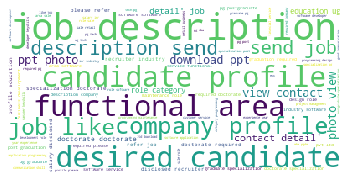

In [72]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

# Text preparation

Text in the corpus needs to be converted to a format that can be interpreted by the machine learning algorithms. There are 2 parts of this conversion — Tokenisation and Vectorisation.

Tokenisation is the process of converting the continuous text into a list of words. The list of words is then converted to a matrix of integers by the process of vectorisation. Vectorisation is also called feature extraction.

For text preparation we use the bag of words model which ignores the sequence of the words and only considers word frequencies.


## Creating a vector of word counts

As the first step of conversion, we will use the CountVectoriser to tokenise the text and build a vocabulary of known words. We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.


The parameters passed into the function:

    cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
    
    max_df — When building the vocabulary ignore terms that have a document frequency strictly higher than             the given threshold (corpus-specific stop words). This is to ensure that we only have words relevant to           the context and not commonly used words.
    
    max_features — determines the number of columns in the matrix.
    
    n-gram range — we would want to look at a list of single words, two words (bi-grams) and three words (tri-         gram) combinations.

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

An encoded vector is returned with a length of the entire vocabulary.

In [74]:
list(cv.vocabulary_.keys())[:10]

['qualification',
 'th',
 'graduation',
 'skill',
 'basic',
 'computer',
 'knowledge',
 'requirement',
 'system',
 'laptop']

## Visualize top N uni-grams, bi-grams & tri-grams

We can use the CountVectoriser to visualise the top 20 unigrams, bi-grams and tri-grams.

[Text(0, 0, 'job'),
 Text(0, 0, 'doctorate'),
 Text(0, 0, 'role'),
 Text(0, 0, 'profile'),
 Text(0, 0, 'software'),
 Text(0, 0, 'experience'),
 Text(0, 0, 'description'),
 Text(0, 0, 'service'),
 Text(0, 0, 'company'),
 Text(0, 0, 'required'),
 Text(0, 0, 'specialization'),
 Text(0, 0, 'candidate'),
 Text(0, 0, 'industry'),
 Text(0, 0, 'business'),
 Text(0, 0, 'skill'),
 Text(0, 0, 'development'),
 Text(0, 0, 'like'),
 Text(0, 0, 'area'),
 Text(0, 0, 'detail'),
 Text(0, 0, 'design')]

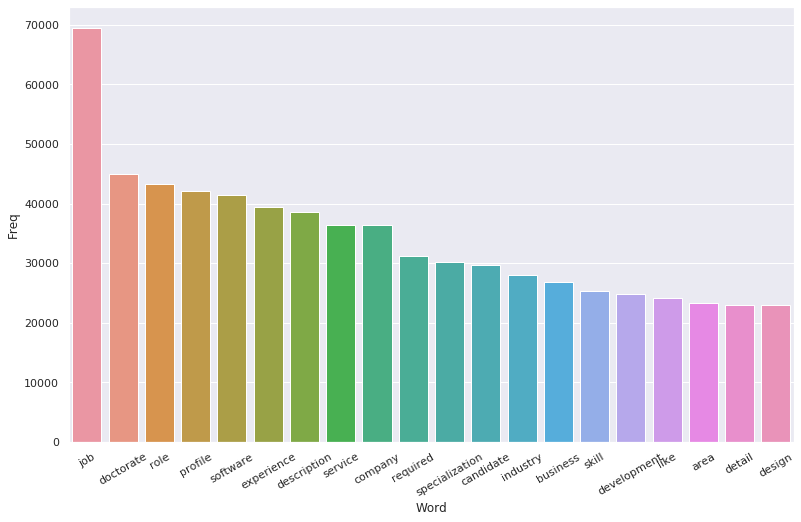

In [75]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                     Bi-gram   Freq
0            job description  37595
1          candidate profile  19816
2          desired candidate  19702
3            functional area  19626
4            company profile  19511
5             contact detail  19441
6                   job like  19430
7           description send  19424
8                   send job  19423
9               download ppt  19357
10                 ppt photo  19357
11                photo view  19357
12              view contact  19357
13             role category  18897
14              education ug  18060
15       doctorate doctorate  15944
16  specialization doctorate  15771
17        doctorate required  15713
18         profile education  15599
19        recruiter industry  14468


[Text(0, 0, 'job description'),
 Text(0, 0, 'candidate profile'),
 Text(0, 0, 'desired candidate'),
 Text(0, 0, 'functional area'),
 Text(0, 0, 'company profile'),
 Text(0, 0, 'contact detail'),
 Text(0, 0, 'job like'),
 Text(0, 0, 'description send'),
 Text(0, 0, 'send job'),
 Text(0, 0, 'download ppt'),
 Text(0, 0, 'ppt photo'),
 Text(0, 0, 'photo view'),
 Text(0, 0, 'view contact'),
 Text(0, 0, 'role category'),
 Text(0, 0, 'education ug'),
 Text(0, 0, 'doctorate doctorate'),
 Text(0, 0, 'specialization doctorate'),
 Text(0, 0, 'doctorate required'),
 Text(0, 0, 'profile education'),
 Text(0, 0, 'recruiter industry')]

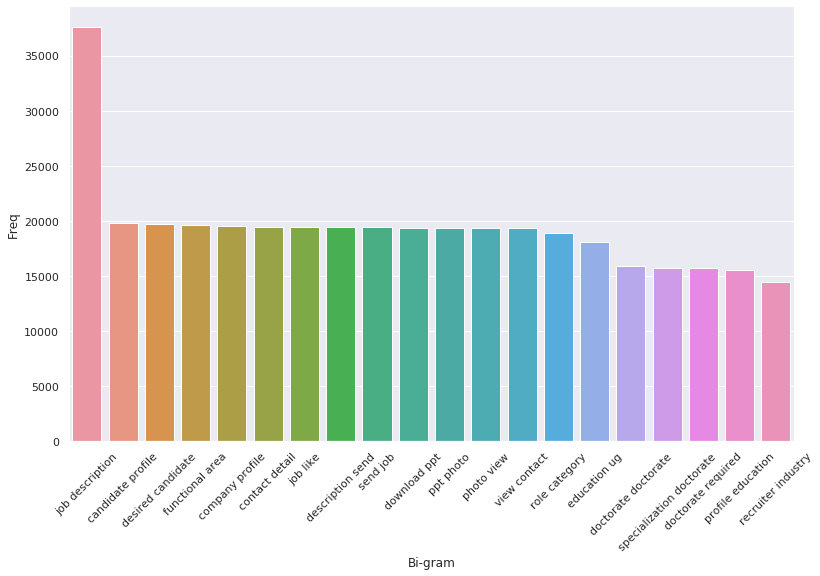

In [76]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                              Tri-gram   Freq
0            desired candidate profile  19650
1                 job description send  19424
2                        send job like  19423
3                 description send job  19422
4                   download ppt photo  19357
5                       ppt photo view  19357
6                   photo view contact  19357
7                  view contact detail  19357
8          candidate profile education  15595
9                 profile education ug  15525
10        disclosed recruiter industry  14467
11          salary disclosed recruiter  14464
12               refer job description  13673
13                    please refer job  13668
14  doctorate doctorate specialization  13166
15   specialization doctorate required  12955
16  doctorate specialization doctorate  12875
17             job description company  11924
18         description company profile  11908
19               required please refer  10811


[Text(0, 0, 'desired candidate profile'),
 Text(0, 0, 'job description send'),
 Text(0, 0, 'send job like'),
 Text(0, 0, 'description send job'),
 Text(0, 0, 'download ppt photo'),
 Text(0, 0, 'ppt photo view'),
 Text(0, 0, 'photo view contact'),
 Text(0, 0, 'view contact detail'),
 Text(0, 0, 'candidate profile education'),
 Text(0, 0, 'profile education ug'),
 Text(0, 0, 'disclosed recruiter industry'),
 Text(0, 0, 'salary disclosed recruiter'),
 Text(0, 0, 'refer job description'),
 Text(0, 0, 'please refer job'),
 Text(0, 0, 'doctorate doctorate specialization'),
 Text(0, 0, 'specialization doctorate required'),
 Text(0, 0, 'doctorate specialization doctorate'),
 Text(0, 0, 'job description company'),
 Text(0, 0, 'description company profile'),
 Text(0, 0, 'required please refer')]

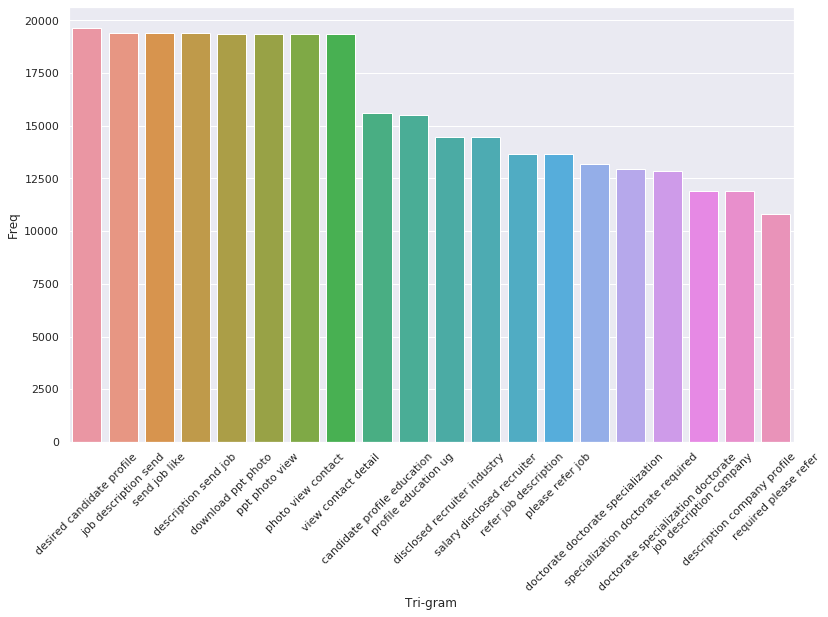

In [77]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

## Converting to a matrix of integers

The next step of refining the word counts is using the TF-IDF vectoriser. The deficiency of a mere word count obtained from the countVectoriser is that, large counts of certain common words may dilute the impact of more context specific words in the corpus. This is overcome by the TF-IDF vectoriser which penalizes words that appear several times across the document. TF-IDF are word frequency scores that highlight words that are more important to the context rather than those that appear frequently across documents.
TF-IDF consists of 2 components:
TF — term frequency
IDF — Inverse document frequency

In [78]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[530]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [79]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
job description send job like warm greeting scaleneworks people solution llp huge opening hcl processor screening co ordination role criterion exp year year sourcing screening co ordination good communication handle screening boarding client handling follow candidate escalation handling sla adherence follow delivery team effectively schedule facilitate interview client hcl scaleneworks payroll ctc lpa lpa open position bangalore chennai pune salary disclosed recruiter industry recruitment staffing functional area hr recruitment administration ir role category hr recruitment ir role recruitment executive keyskills sourcing scheduling coordination hr executive interview scheduling interview coordination screening profile screening desired candidate profile education ug graduate specialization company profile confidential confidential download ppt photo view contact detail

Keywords:
screening 0.441
lpa 0.192
recruitment 0.184
interview 0.178
hcl 0.176


In [80]:
0.8*len(corpus)/10

1553.76

Finding the indices of train['industry'] with null values

In [81]:
train[train['industry'].isnull()].index.tolist()

[2767, 3025, 3144, 16000]

In [82]:
train.loc[2767,'industry'] = 'Not Specified'
train.loc[3025,'industry'] = 'Not Specified'
train.loc[3144,'industry'] = 'Not Specified'
train.loc[16000,'industry'] = 'Not Specified'

In [83]:
X_train = corpus[:1553]
X_test = corpus[1553:]
y_train = train.loc[:1553,'industry']
y_test = train.loc[1553:,'industry']

In [84]:
print(len(corpus), len(train), len(X_train), len(X_test), len(y_train), len(y_test))

19422 19422 1553 17869 1554 17869


In [85]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(1553, 12038) (17869, 12038)


In [86]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train[:1553])

In [87]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.4393642621299457


In [88]:
print(y_test.isnull().sum())

0


In [89]:
train['industry'].isnull().sum()

0

In [90]:
from sklearn import svm
clf_svm = svm.SVC().fit(train_vectors, y_train[:1553])
predicted_svm = clf_svm.predict(test_vectors)
print(accuracy_score(y_test, predicted_svm))

0.5562146734568246


In [91]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(n_estimators=18).fit(train_vectors, y_train[:1553])
predicted_rfc = clf_rfc.predict(test_vectors)
print(accuracy_score(y_test, predicted_rfc))

0.6422295595724439


In [92]:
from sklearn.metrics import f1_score
f1_score(y_test, predicted_rfc, average='micro')

0.6422295595724439

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbc = GradientBoostingClassifier(random_state=10).fit(train_vectors, y_train[:1553])
predicted_gbc = clf_gbc.predict(test_vectors)
f1_score(y_test, predicted_gbc, average='micro')

0.8144272203257037

In [104]:
from sklearn.ensemble import AdaBoostClassifier
clf_abc = AdaBoostClassifier(n_estimators=100, random_state=0).fit(train_vectors, y_train[:1553])
predicted_abc = clf_abc.predict(test_vectors)
f1_score(y_test, predicted_abc, average='micro')

0.5107168839890313

In [93]:
predicted_rfc

array(['IT-Software / Software Services',
       'IT-Software / Software Services',
       'IT-Software / Software Services', ...,
       'IT-Software / Software Services',
       'IT-Software / Software Services',
       'IT-Software / Software Services'], dtype=object)

In [94]:
corpus_rfc = []
for i in range(len(test)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(test['jobdescription'][i]))
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus_rfc.append(text)

In [95]:
print(len(corpus_rfc), len(test))

2577 2577


In [96]:
X_true_test = corpus_rfc
true_test_vectors = vectorizer.transform(X_true_test)

In [97]:
predicted_test_rfc = clf_rfc.predict(true_test_vectors)
print(len(predicted_test_rfc), predicted_test_rfc[:2])

2577 ['Education / Teaching / Training' 'Agriculture / Dairy']


In [98]:
submission_r = pd.read_csv('sample_submission.csv')

In [99]:
print(len(submission_r))

2577


In [100]:
for i in range(len(submission_r)):
    submission_r.loc[i,'industry'] = predicted_test_rfc[i]

In [101]:
submission_r.head()

,Id,industry
0,19423,Education / Teaching / Training
1,19424,Agriculture / Dairy
2,19425,IT-Software / Software Services
3,19426,IT-Software / Software Services
4,19427,Recruitment / Staffing


In [102]:
submission_r.to_csv('submission_r_2.csv', index=False)

In [105]:
submission_g = pd.read_csv('sample_submission.csv')

In [106]:
print(len(submission_g))

2577


In [107]:
predicted_test_gbc = clf_gbc.predict(true_test_vectors)
print(len(predicted_test_gbc), predicted_test_gbc[:2])

2577 ['Education / Teaching / Training' 'FMCG / Foods / Beverage']


In [108]:
for i in range(len(submission_g)):
    submission_g.loc[i,'industry'] = predicted_test_gbc[i]

In [109]:
submission_g.head()

,Id,industry
0,19423,Education / Teaching / Training
1,19424,FMCG / Foods / Beverage
2,19425,IT-Software / Software Services
3,19426,IT-Software / Software Services
4,19427,Recruitment / Staffing


In [110]:
submission_g.to_csv('submission_g.csv', index=False)